In [286]:
import numpy as np
import matplotlib as plt
import os
import pickle

In [287]:
EVAL_DIR = '../evaluations'

In [353]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def plot_combined(eval_list, interval, file_name):        
    colors = ['r', 'g', 'b', 'm']
    mark_size = 5
    fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True,figsize=(8, 5))
    
    for c_idx, (info, (stats, keys, run_time)) in enumerate(eval_list):
        picked_idx = np.arange(1, stats.shape[0]) % interval == 0
        picked_idx[-1] = True
        picked_stats = stats[1:][picked_idx]
        picked_stats_idx = np.squeeze(np.where(picked_idx))
                               
        for d_idx, k in enumerate(['error(train)', 'error(valid)']):
            if k == 'error(train)':
                ax.plot(
                    picked_stats_idx,
                    picked_stats[:, keys[k]],  
                    label=f'{k}, {info}',
                    marker=".",
                    color=colors[c_idx],
                    markersize=mark_size 
                )
            else:
                ax.plot(
                    picked_stats_idx,
                    picked_stats[:, keys[k]],  
                    dashes=[3, 2, 3, 2],
                    label=f'{k}, {info}',
                    color=colors[c_idx],
                )
                

    ax.legend(loc='best')

    plt.ylabel('Cross-entropy error', {'fontsize': 13, 'fontweight': 500})
    plt.xlabel('Epoch number', {'fontsize': 13, 'fontweight': 500})
    plt.tight_layout()
    plt.savefig(file_name)
    plt.show()


# Task 1

## A. Varying Hidden Units

In [354]:
inputs = [
    ('units=32','32-unit-1-Hidden-Layer-Networks.pickle'),
    ('units=64','64-unit-1-Hidden-Layer-Networks.pickle'),
    ('units=128','128-unit-1-Hidden-Layer-Networks.pickle')
]

eval_list = []
for info, eval_path in inputs:
    with open(os.path.join(EVAL_DIR, eval_path), 'rb') as f:
        eval_list.append((info, pickle.load(f)))

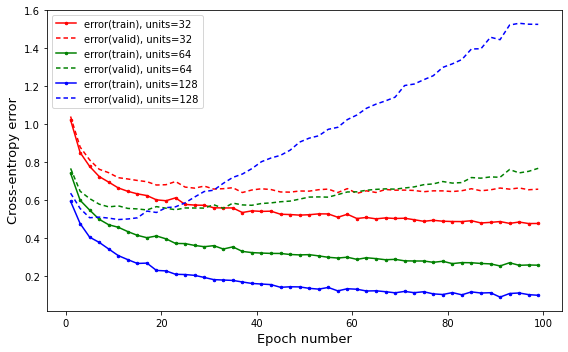

In [355]:
plot_combined(eval_list, interval=2, file_name='../images/T1-varying-hidden-units-32-64-128.pdf')

# B. Varying Hidden Layers

In [356]:
inputs = [
    ('h-layers=1','128-unit-1-Hidden-Layer-Networks.pickle'),
    ('h-layers=2','128-unit-2-Hidden-Layer-Networks.pickle'),
    ('h-layers=3','128-unit-3-Hidden-Layer-Networks.pickle'),
]

eval_list = []
for info, eval_path in inputs:
    with open(os.path.join(EVAL_DIR, eval_path), 'rb') as f:
        eval_list.append((info, pickle.load(f)))

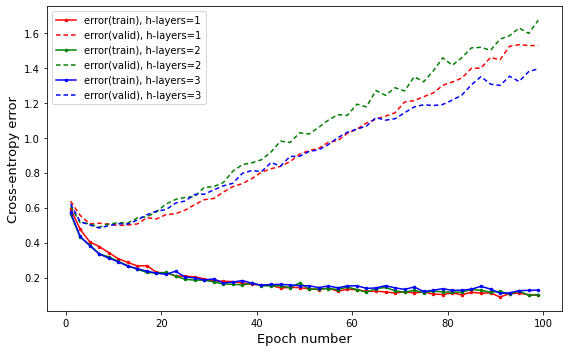

In [358]:
plot_combined(eval_list, interval=2, file_name='../images/T1-varying-hidden-layers-1-2-3.pdf')

# Adding Dropout 0.5

In [360]:
inputs = [
    ('no dropout','128-unit-3-Hidden-Layer-Networks.pickle'),
    ('dropout=0.5','T2.2-128-unit-3-Hidden-Layer-Dropout-0.5-Networks.pickle'),
]

eval_list = []
for info, eval_path in inputs:
    with open(os.path.join(EVAL_DIR, eval_path), 'rb') as f:
        eval_list.append((info, pickle.load(f)))

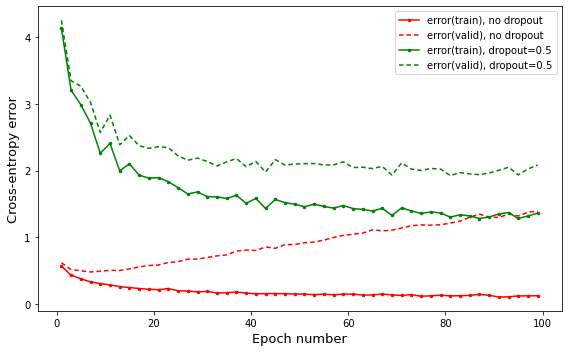

In [361]:
plot_combined(eval_list, interval=2, file_name='../images/T2.Adding-Dropout-0.5.pdf')

# D. Varying Dropout Rates

In [314]:
inputs = [
    ('dropout=0.5','T2.2-128-unit-3-Hidden-Layer-Dropout-0.5-Networks.pickle'),
    ('dropout=0.6','T2.2-128-unit-3-Hidden-Layer-Dropout-0.6-Networks.pickle'),
    ('dropout=0.7','T2.2-128-unit-3-Hidden-Layer-Dropout-0.7-Networks.pickle'),
    ('dropout=0.8','T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-Networks.pickle'),
]

eval_list = []
for info, eval_path in inputs:
    with open(os.path.join(EVAL_DIR, eval_path), 'rb') as f:
        eval_list.append((info, pickle.load(f)))

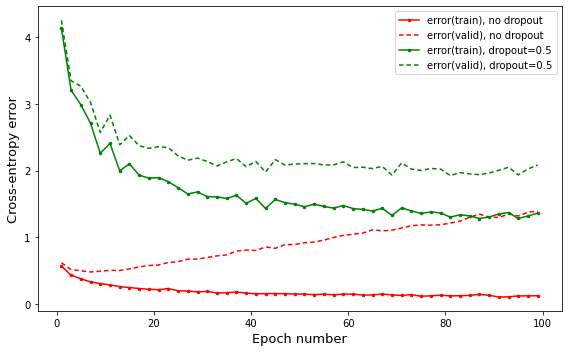

In [362]:
plot_combined(eval_list, interval=2, file_name='../images/T2-dropout-rates-0.5-0.6-0.7-0.8.pdf')

# E. Adding L1 and L2 (Dropout=0.8)

In [364]:
inputs = [
    ('dropout','T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-Networks.pickle'),
    ('dropout+L1','T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-Networks.pickle'),
    ('dropout+L2','T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L2-Networks.pickle'),
]

eval_list = []
for info, eval_path in inputs:
    with open(os.path.join(EVAL_DIR, eval_path), 'rb') as f:
        eval_list.append((info, pickle.load(f)))

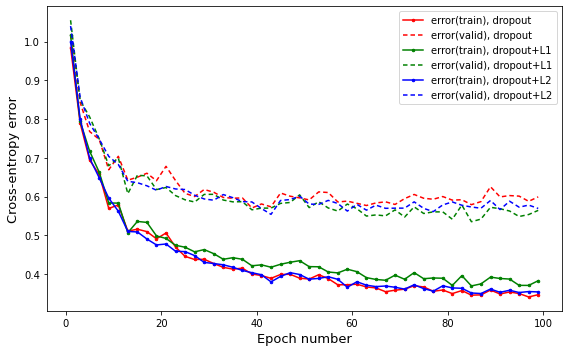

In [365]:
plot_combined(eval_list, interval=2, file_name='../images/T2-Adding-L1-L2.pdf')

# Varying Learning Rates

In [366]:
inputs = [
    ('lr=0.0007','T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-lr-0.0007-Networks.pickle'),
    ('lr=0.001','T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-lr-0.001-Networks.pickle'),
    ('lr=0.003','T2.2-128-unit-3-Hidden-Layer-Dropout-0.8-L1-lr-0.003-Networks.pickle'),
]

eval_list = []
for info, eval_path in inputs:
    with open(os.path.join(EVAL_DIR, eval_path), 'rb') as f:
        eval_list.append((info, pickle.load(f)))

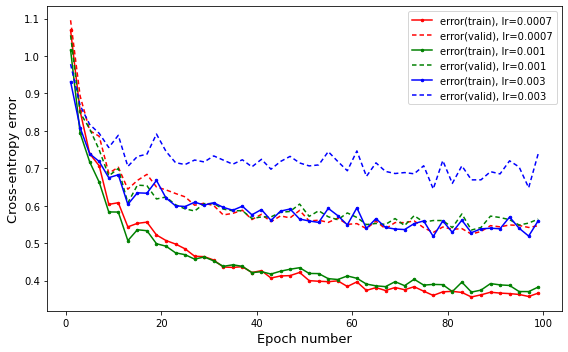

In [367]:
plot_combined(eval_list, interval=2, file_name='../images/T1-varying-learning-rates-0.007-0.001-0.003.pdf')

In [323]:
# nn = np.array([2, 3, 4, 5, 2, 4, 5, 6, 7, 6])
# # nn[np.arange(1, len(nn)) % 2 == 0]
# picked_idx = np.arange(1, len(nn)) % 2 == 0
# picked_idx[-1] = True
# print(picked_idx)
# nd = nn[picked_idx]
# print(nd)
# np.where(picked_idx)

In [327]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

def test_function(y1, y2, y3):

  x = np.arange(0.1, 8.1, 1)

  y4 = y1 - 0.6
  y5 = y2 - 0.6
  y6 = y3 - 0.6

  fig, ax = plt.subplots(nrows=1, ncols=1, sharex=True,
                                      figsize=(6, 4))
  
  mark_size = 7

  ax.set_title('testing')
  ax.plot(x, y1, marker="+", markersize=mark_size, linestyle="None", color="g", label='err(train),lr=0.1')
  ax.plot(x, y2, marker="+", markersize=mark_size, linestyle="None", color="b", label='err(train),lr=0.2')
  ax.plot(x, y3, marker="+", markersize=mark_size, linestyle="None", color="r", label='err(train),lr=0.3')
  ax.plot(x, y4, dashes=[2, 2, 10, 2], color="g", label='err(val),lr=0.1')
  ax.plot(x, y5, dashes=[2, 2, 10, 2], color="b", label='err(val),lr=0.2')
  ax.plot(x, y6, dashes=[2, 2, 10, 2], color="r", label='err(val),lr=0.3')

  ax.legend()

  plt.ylabel('Error')
  plt.xlabel('Epoch')

  plt.show()




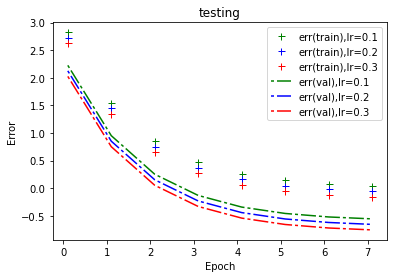

In [328]:
xt = np.arange(0.1, 8.1, 1)

testy1 = 3 * np.exp(-0.6 * xt)
testy2 = testy1 - 0.1
testy3 = testy1 - 0.2

test_function(testy1, testy2, testy3)